# I. Linear Regression
- Making a sample scatter plot
- Normal equation method
- SGD method

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

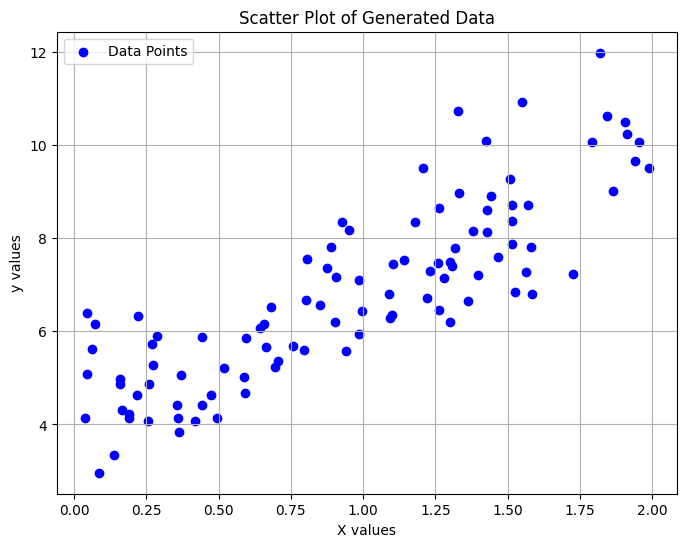

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Data Points")
plt.xlabel("X values")
plt.ylabel("y values")
plt.title("Scatter Plot of Generated Data")
plt.legend()
plt.grid(True)
plt.show()

#### METHOD 1 of 2: normal equation (closed equation, no need for iteration)

We might not be able to leapfrog to an answer in y = mx +b format, but we can find a "mid-point" on the best-fit line by finding the average X and Y values. Then we can find calculate slope using a method described in this [YouTube vid](https://www.youtube.com/watch?v=GhrxgbQnEEU&ab_channel=EugeneO%27Loughlin). Knowing the slope (m) and a single point on the line (x and y baked in), we can isolate the b. Below is a demonstration of calculation slope "m":

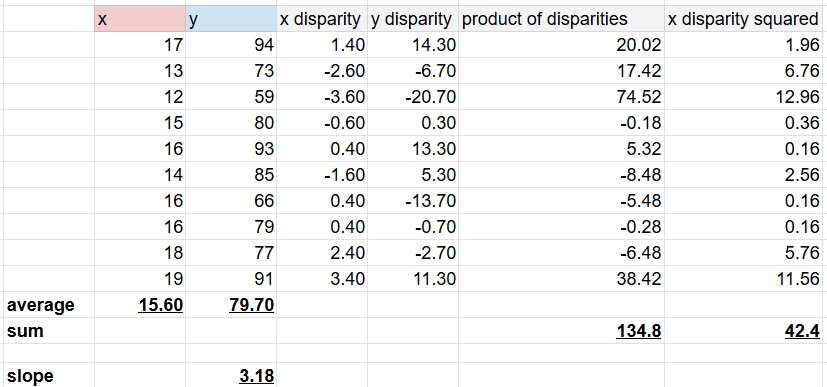<br>

79.70 = (3.18 * 15.60) + b<br>
b = 79.70 - (49.61) = 30.09<br>
Therefore, the best-fit line is __y = 3.18x + 30.09__

#### METHOD 2 of 2: SGD